<a href="https://colab.research.google.com/github/ArvindRajen/Conceptual_Analysis/blob/main/Hotel_Reviews_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
import seaborn as sns; 
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content"))
df = pd.read_csv('/content/Hotel_Reviews.csv')
df.head()

['.config', 'Hotel_Reviews.csv', 'sample_data']


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:
df.shape

(515738, 17)

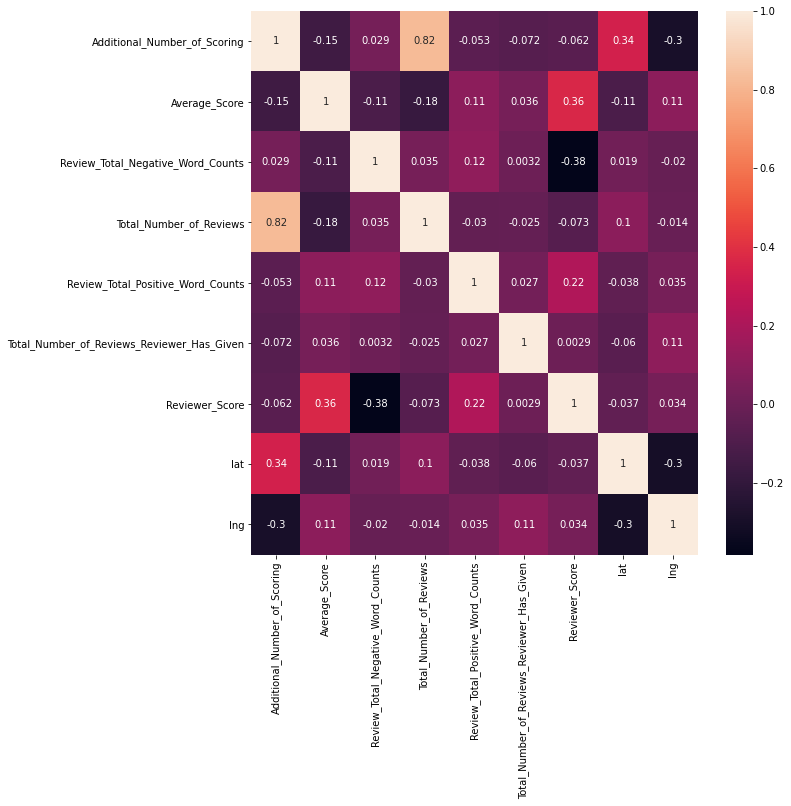

In [19]:
df.corr()

f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,ax=ax) 

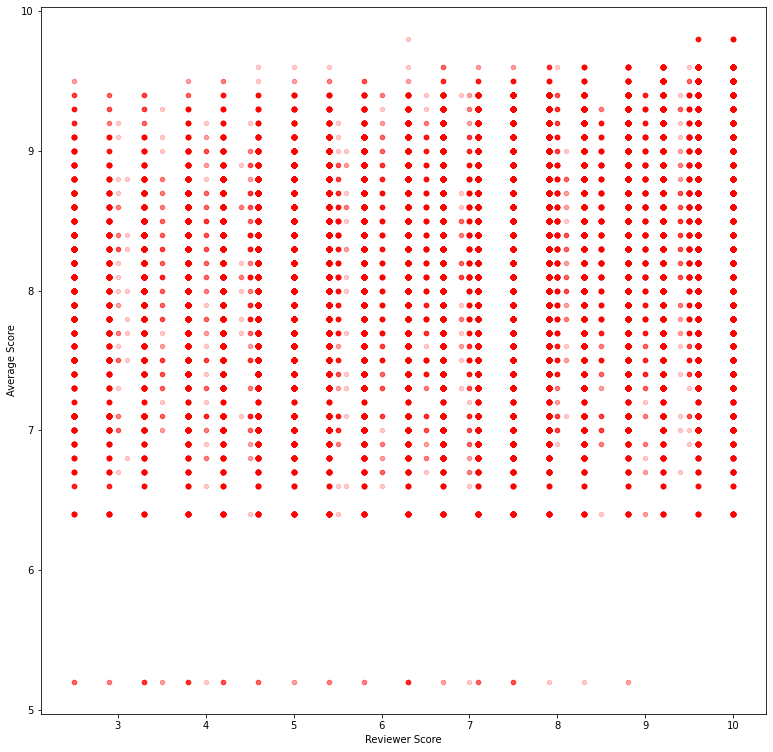

In [20]:
df.plot(kind='scatter',x='Reviewer_Score',y='Average_Score',alpha=0.2,color='red',figsize=(13,13))
plt.xlabel('Reviewer Score')
plt.ylabel('Average Score')
plt.show()

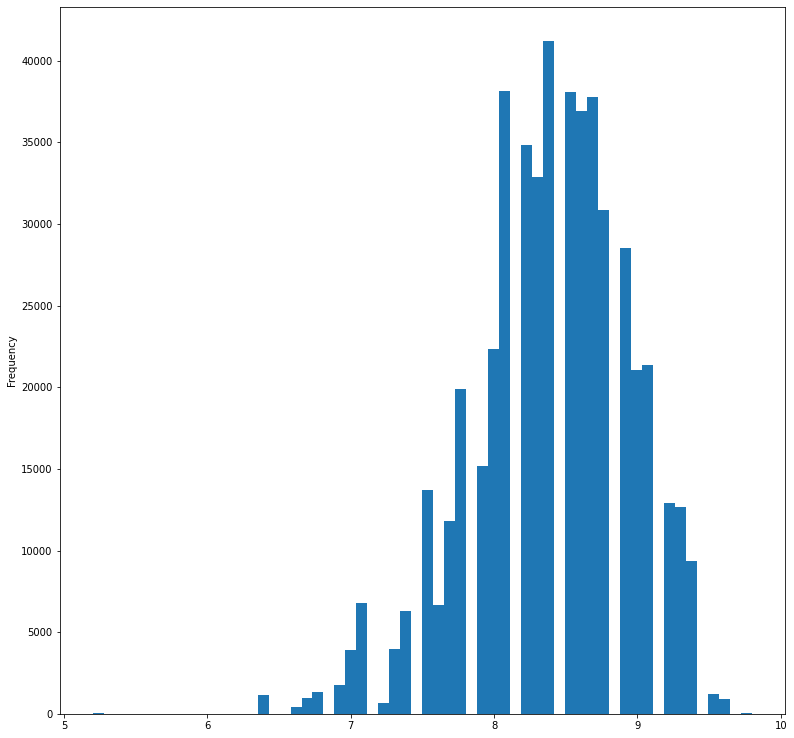

In [21]:
df.Average_Score.plot(kind='hist',bins=60,figsize=(13,13))
plt.show()

We need to know how many hotels we are looking at so :

In [4]:
print(df.Hotel_Name.nunique(), 'hotels in the dataset')

1492 hotels in the dataset


Now that we know there *1492* Hotels in the data set we now look at the average reviews of the hotel. 

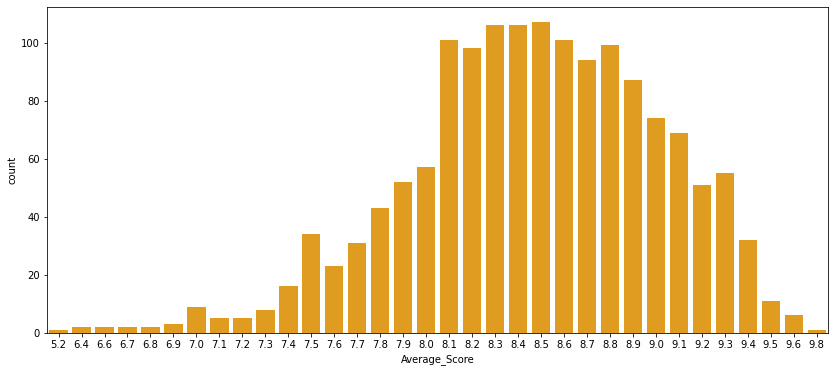

In [5]:
df_uni = df[['Hotel_Name','Average_Score']].drop_duplicates()
plt.figure(figsize = (14,6))
sns.countplot(x = 'Average_Score',data = df_uni,color = 'orange')

This is interesting as the average scores indicate that most reviews lie between 8 - 9, meaning that the hotels within the dataset are generally pretty good but we know that the human mind is a thing of many intricacies and words can sometimes convey a different meaning to when we use numbers

In [6]:
df.Average_Score.describe()

count    515738.000000
mean          8.397487
std           0.548048
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: Average_Score, dtype: float64

In [7]:
df.Hotel_Address[10]

' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands'

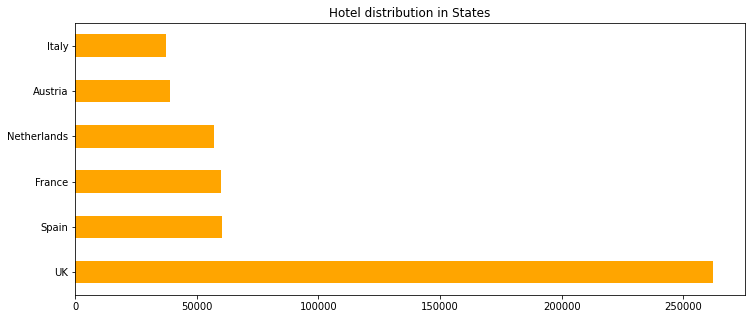

In [8]:
df.Hotel_Address = df.Hotel_Address.str.replace('United Kingdom','UK')
df['State'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-1])
# Now we can check distribution in  and in state
plt.figure(figsize = (12,5))
plt.title('Hotel distribution in States')
df.State.value_counts().plot.barh(color = 'orange')

In [9]:
df[df.Average_Score >= 8.8][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Total_Number_of_Reviews',ascending = False)[:15]

,Hotel_Name,Average_Score,Total_Number_of_Reviews
404728,Glam Milano,8.8,7371
309843,Jaz Amsterdam,8.9,7108
327773,Ayre Hotel Gran V a,8.8,4887
57597,M by Montcalm Shoreditch London Tech City,9.1,4802
450210,Hotel Esther a,9.1,4687
180550,citizenM Tower of London,9.1,4672
370315,25hours Hotel beim MuseumsQuartier,8.8,4324
361190,Hilton London Wembley,8.8,4305
14829,Intercontinental London The O2,9.4,4204
470003,The Square Milano Duomo,9.0,4192


In [10]:
#split city
df['City']= df.Hotel_Address.apply(lambda x: x.split(' ')[-2])
# find the best 10 hotels in Amsterdam
df[(df.Average_Score >= 9.0) & (df.City == 'Amsterdam')][['Hotel_Name','Average_Score']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

,Hotel_Name,Average_Score
341657,Waldorf Astoria Amsterdam,9.5
270116,Pillows Anna van den Vondel Amsterdam,9.4
356072,The Toren,9.4
393386,Luxury Suites Amsterdam,9.3
421334,Andaz Amsterdam Prinsengracht A Hyatt Hotel,9.3
340344,The Hoxton Amsterdam,9.3
340753,Ambassade Hotel,9.3
355888,Canal House,9.3
393615,Sofitel Legend The Grand Amsterdam,9.2
469602,Conservatorium Hotel,9.2


In [11]:
# find the worst 10 hotels in Paris
df[(df.Average_Score <= 8.1) & (df.City == 'Paris')][['Hotel_Name','Average_Score']].drop_duplicates().sort_values(by ='Average_Score',ascending = True)[:10]

,Hotel_Name,Average_Score
68936,Villa Eugenie,6.8
209504,Villa Lut ce Port Royal,7.0
218258,Hotel Royal Elys es,7.0
135430,Hyatt Regency Paris Etoile,7.1
22189,Holiday Inn Paris Montparnasse Pasteur,7.1
220893,Amarante Beau Manoir,7.2
206499,Mercure Paris Champs Elys es,7.2
229326,Best Western Hotel Montmartre Sacr Coeur,7.2
3813,Kube Hotel Ice Bar,7.2
168654,H tel De Castiglione,7.2


In [12]:
df_com = df[['Hotel_Name','Reviewer_Score','Negative_Review','Review_Total_Negative_Word_Counts','Positive_Review','Review_Total_Positive_Word_Counts',
             'Total_Number_of_Reviews','Total_Number_of_Reviews_Reviewer_Has_Given']]

In [13]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [14]:
# Create NLP and machine learning environment
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import CountVectorizer

#NLP prepross neg and pos reviews
neg = []
for i in df_com['Negative_Review']:
    letters = re.sub('[^a-zA-Z]',' ',i)
    tokens = nltk.word_tokenize(letters)
    lowercase = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lowercase))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result] 
    neg.append(' '.join(lemmas))
    
pos = []
for i in df_com['Positive_Review']:
    pletters = re.sub('[^a-zA-Z]',' ',i)
    ptokens = nltk.word_tokenize(pletters)
    plowercase = [l.lower() for l in ptokens]
    filtered_presult = list(filter(lambda l: l not in stop_words, plowercase))
    plemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_presult] 
    pos.append(' '.join(plemmas))



In [15]:
#Finding most important words in Negative Reviews and in Postive Reviews
cv = CountVectorizer(analyzer = 'word',stop_words = 'english',max_features = 20,ngram_range=(2,2))
most_negative_words = cv.fit_transform(neg)
temp_counts = most_negative_words.sum(axis=0)
temp_words = cv.vocabulary_
print('the most important words in Negative Reviews:')
print('--------------------------------------------')
display(temp_words)

print('                                          ')
cv = CountVectorizer(analyzer = 'word',stop_words = 'english',max_features = 20,ngram_range=(2,2))
most_positive_words = cv.fit_transform(pos)
temp1_counts = most_positive_words.sum(axis=0)
temp1_words = cv.vocabulary_
print('the most important words in Positive Reviews:')
print('--------------------------------------------')
temp1_words

the most important words in Negative Reviews:
--------------------------------------------


{'air conditioning': 0,
 'bit small': 1,
 'booking com': 2,
 'breakfast expensive': 3,
 'breakfast included': 4,
 'breakfast room': 5,
 'double bed': 6,
 'double room': 7,
 'hotel room': 8,
 'little bit': 9,
 'mini bar': 10,
 'room bit': 11,
 'room little': 12,
 'room room': 13,
 'room service': 14,
 'room small': 15,
 'small room': 16,
 'star hotel': 17,
 'tea coffee': 18,
 'wi fi': 19}

                                          
the most important words in Positive Reviews:
--------------------------------------------


{'bed comfortable': 0,
 'breakfast good': 1,
 'clean room': 2,
 'comfortable bed': 3,
 'comfortable room': 4,
 'comfy bed': 5,
 'excellent location': 6,
 'friendly helpful': 7,
 'friendly staff': 8,
 'good breakfast': 9,
 'good location': 10,
 'great location': 11,
 'helpful staff': 12,
 'location excellent': 13,
 'location good': 14,
 'location great': 15,
 'room clean': 16,
 'staff friendly': 17,
 'staff helpful': 18,
 'walking distance': 19}

In [16]:
df_com['+'] = 1
df_com['-'] = 1
df_com['+'] = df_com.apply(lambda x: 0 if x["Positive_Review"] == 'No Positive' else x['+'],axis =1)
df_com['-'] = df_com.apply(lambda x: 0 if x["Negative_Review"] == 'No Negative' else x['-'],axis =1)
counted_reviews = pd.DataFrame(df_com.groupby(['Hotel_Name'])['+','-','Total_Number_of_Reviews_Reviewer_Has_Given'].sum())
counted_reviews['Total'] = counted_reviews['+'] +counted_reviews['-']
counted_reviews['Neg_rate'] = round(counted_reviews['-'] / counted_reviews['Total'],2)
counted_reviews['Neg_rate'].describe()

counted_reviews[counted_reviews.Neg_rate > 0.5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,+,-,Total_Number_of_Reviews_Reviewer_Has_Given,Total,Neg_rate
Hotel_Name,,,,,
AC Hotel Irla a Marriott Lifestyle Hotel,12,13,148,25,0.52
BEST WESTERN Maitrise Hotel Maida Vale,695,732,5023,1427,0.51
Best Western Maitrise Hotel Edgware Road,175,203,901,378,0.54
Britannia International Hotel Canary Wharf,4099,4262,22855,8361,0.51
Gran Hotel Barcino,66,73,385,139,0.53
Hallmark Hotel London Chigwell Prince Regent,384,415,2319,799,0.52
Hotel Liberty,51,64,395,115,0.56
Ibis Styles Milano Palmanova,9,11,37,20,0.55
Idea Hotel Milano San Siro,393,419,4132,812,0.52


In [17]:
df[df.Hotel_Name == 'Hotel Liberty'][['Positive_Review','Negative_Review','Average_Score']]

,Positive_Review,Negative_Review,Average_Score
494791,No Positive,The room is really dirty dirt and dust are ev...,5.2
494792,Good location quiet if rooms are on the inter...,There is no wi fi in the rooms and no air con...,5.2
494793,Great location with public transport links on...,The hotel was advertised with air conditionin...,5.2
494794,Tram lines,There was no hot water in my room and staff w...,5.2
494795,Breakfast was good,NO wifi in room You have to go to portal for ...,5.2
...,...,...,...
494851,No Positive,It feels like a 2 star hotel masquerading as ...,5.2
494852,Quiet area good breakfast and nice clean hotel,Air con was ineffective so it was pretty warm...,5.2
494853,No Positive,pas de chaines internationales,5.2
494854,V friendly staff,Ac not good,5.2


#Part 2

In [18]:
import pandas as pd

# read data
reviews_df = pd.read_csv("/content/Hotel_Reviews.csv")
# append the positive and negative text reviews
reviews_df["review"] = reviews_df["Negative_Review"] + reviews_df["Positive_Review"]
# create the label
reviews_df["is_bad_review"] = reviews_df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)
# select only relevant columns
reviews_df = reviews_df[["review", "is_bad_review"]]
reviews_df.head()

,review,is_bad_review
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0
